In [1]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from collections import Counter
from PIL import Image
#Importing HTMLParser
import html
from html.parser import HTMLParser
html_parser = HTMLParser()

# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

import os
#go through the file location
for dirname,_, filenames in os.walk('E:\ibm'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import pprint
import collections 
import re  #re = regular expression
from textblob import TextBlob
import nltk
#nltk.download('stopwords') 
#nltk.download('punkt') #tokenizer (divides line into words/sentence)
#nltk.download('wordnet') #lexical database
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize #tokenization CREATING A LIST OF WORDS

from wordcloud import WordCloud        

E:\ibm\bird.png
E:\ibm\book.csv
E:\ibm\common words.png
E:\ibm\Company.csv
E:\ibm\Company_Tweet.csv
E:\ibm\count.png
E:\ibm\download (1).png
E:\ibm\neg bird.png
E:\ibm\neu bird.png
E:\ibm\NSE-TATAGLOBAL11.csv
E:\ibm\pie.png
E:\ibm\posi bird.png
E:\ibm\posi.jpg
E:\ibm\Screenshot 2021-07-30 151106.png
E:\ibm\Screenshot 2021-07-30 151133.png
E:\ibm\Screenshot 2021-07-30 151254.png
E:\ibm\Screenshot 2021-07-30 151331.png
E:\ibm\stock_data.csv
E:\ibm\tree neg.png
E:\ibm\tree neu.png
E:\ibm\tree psoi.png
E:\ibm\Tweet.csv
E:\ibm\tweets_labelled.csv
E:\ibm\tweet_img.png


In [2]:
#importing data set
os.chdir(r"E:\ibm")
file_name = 'tweets_labelled.csv'
data = pd.read_csv(file_name, sep=';') #indexing of datafrane can be removed with set_index, sep is used as delimeter to separate where ; comes
data.shape
#data.dropna()

(5000, 4)

In [3]:
#preprocess data/cleaning 
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
data['clean'] = data['text'].apply(lambda x: html_parser.unescape(x))

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

data['clean'] = np.vectorize(remove_pattern)(data['clean'], "@[\w]*")
data['clean'] = data['clean'].apply(lambda x: x.lower())
data['clean'] = data['clean'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
data['clean'] = data['clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
data['clean'] = data['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [4]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"rt":"",
"RT":"",
"http":"",
"https":"",
"trade":"",
"higher":"",
"day":"",
"stock":"",
"new":"",
"buy":"",
"time":"",
"invest":"",
"today":"",
"close":"",
"market":"",
"stockmarket":"",
"compani":"",
"see":""
}

def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

data['clean'] = data['clean'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [5]:
# Creating token for the clean tweets
data['tweet_token'] =data['clean'].apply(lambda x: word_tokenize(x))

#remove stop words
stop_words = set(stopwords.words('english'))
# Created new columns of tokens - where stop words are being removed
data['filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
## Tokens columns with stop words and without stop words

In [6]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['tweet_stemmed'] = data['filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
data['tweet_lemmatized'] = data['filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))


In [7]:
#data.drop(['created_at','sentiment','text','filtered'],axis=1,inplace=True)
#data.drop(['sentiment'],axis=1,inplace=True)
data

id                 created_at  \
0      77522  2020-04-15 01:03:46+00:00   
1     661634  2020-06-25 06:20:06+00:00   
2     413231  2020-06-04 15:41:45+00:00   
3     760262  2020-07-03 19:39:35+00:00   
4     830153  2020-07-09 14:39:14+00:00   
...      ...                        ...   
4995  411380  2020-06-04 18:14:57+00:00   
4996   62318  2020-04-14 02:15:01+00:00   
4997  627230  2020-06-23 14:08:15+00:00   
4998  890123  2020-07-14 23:18:34+00:00   
4999  301411  2020-05-06 04:22:19+00:00   

                                                   text sentiment  \
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive   
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative   
2     Net issuance increases to fund fiscal programs...  positive   
3     RT @bentboolean: How much of Amazon's traffic ...  positive   
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive   
...                                                 ...       ...   
4995  With ad revenues falling, what’s the impact on...       NaN   
4996  RT @KelvinSCWong: Well another point to add to...       NaN   
4997  $ITOX working on a contract with a fortune 500...       NaN   
4998  $DIS it could break the 120 pin, then 125&gt; ...       NaN   
4999  Amedisys Inc $AMED COO Christopher Gerard Sell...       NaN   

                                                  clean  \
0      yo enter to win 000 monarch tokens us   crash...   
1     srilanka surcharge on fuel removed the surchar...   
2     net issuance increases to fund fiscal programs...   
3      how much of amazon traffic is served by fastl...   
4     amd ryzen 4000 desktop cpus looking great and ...   
...                                                 ...   
4995  with ad revenues falling what the impact on so...   
4996   well another point to add to dent the current...   
4997  itox working on contract with fortune 500 aero...   
4998  dis it could break the 120 pin then 125 130 ab...   
4999  amedisys inc amed coo christopher gerard sells...   

                                            tweet_token  \
0     [yo, enter, to, win, 000, monarch, tokens, us,...   
1     [srilanka, surcharge, on, fuel, removed, the, ...   
2     [net, issuance, increases, to, fund, fiscal, p...   
3     [how, much, of, amazon, traffic, is, served, b...   
4     [amd, ryzen, 4000, desktop, cpus, looking, gre...   
...                                                 ...   
4995  [with, ad, revenues, falling, what, the, impac...   
4996  [well, another, point, to, add, to, dent, the,...   
4997  [itox, working, on, contract, with, fortune, 5...   
4998  [dis, it, could, break, the, 120, pin, then, 1...   
4999  [amedisys, inc, amed, coo, christopher, gerard...   

                                               filtered  \
0     [yo, enter, win, 000, monarch, tokens, us, cra...   
1     [srilanka, surcharge, fuel, removed, surcharge...   
2     [net, issuance, increases, fund, fiscal, progr...   
3     [much, amazon, traffic, served, fastly, help, ...   
4     [amd, ryzen, 4000, desktop, cpus, looking, gre...   
...                                                 ...   
4995  [ad, revenues, falling, impact, social, media,...   
4996  [well, another, point, add, dent, current, opt...   
4997  [itox, working, contract, fortune, 500, aerosp...   
4998  [dis, could, break, 120, pin, 125, 130, co, js...   
4999  [amedisys, inc, amed, coo, christopher, gerard...   

                                          tweet_stemmed  \
0     yo enter win 000 monarch token us crash learn ...   
1     srilanka surcharg fuel remov surcharg rs 26 im...   
2     net issuanc increas fund fiscal program yield ...   
3     much amazon traffic serv fastli help us find r...   
4     amd ryzen 4000 desktop cpu look great track la...   
...                                                 ...   
4995  ad revenu fall impact social media stock fb go...   
4996  well anoth point add dent current optim stock ...   
4997  

In [8]:
#calculating sentiments

def GetTextSubjectivity(txt): 
    return TextBlob(txt).sentiment.subjectivity

def GetTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

data['Subjectivity'] = data['tweet_lemmatized'].apply(GetTextSubjectivity)
data['Polarity'] = data['tweet_lemmatized'].apply(GetTextPolarity)

def GetTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
    
data["Score"]=data['Polarity'].apply(GetTextAnalysis)

In [9]:
positive=data[data['Score']=='Positive']
print (str(positive.shape[0]/(data.shape[0])*100) + "% Positive tweets")
pos = positive.shape[0]/(data.shape[0])*100

negative=data[data['Score']=='Negative']
print (str((negative.shape[0])/(data.shape[0])*100) + "% negative tweets")
neg = negative.shape[0]/data.shape[0]*100

neutral=data[data['Score']=='Neutral']
print (str((neutral.shape[0])/(data.shape[0])*100) + "% neutral tweets")
neu = neutral.shape[0]/data.shape[0]*100

36.58% Positive tweets
15.78% negative tweets
47.64% neutral tweets


In [10]:
data

id                 created_at  \
0      77522  2020-04-15 01:03:46+00:00   
1     661634  2020-06-25 06:20:06+00:00   
2     413231  2020-06-04 15:41:45+00:00   
3     760262  2020-07-03 19:39:35+00:00   
4     830153  2020-07-09 14:39:14+00:00   
...      ...                        ...   
4995  411380  2020-06-04 18:14:57+00:00   
4996   62318  2020-04-14 02:15:01+00:00   
4997  627230  2020-06-23 14:08:15+00:00   
4998  890123  2020-07-14 23:18:34+00:00   
4999  301411  2020-05-06 04:22:19+00:00   

                                                   text sentiment  \
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive   
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative   
2     Net issuance increases to fund fiscal programs...  positive   
3     RT @bentboolean: How much of Amazon's traffic ...  positive   
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive   
...                                                 ...       ...   
4995  With ad revenues falling, what’s the impact on...       NaN   
4996  RT @KelvinSCWong: Well another point to add to...       NaN   
4997  $ITOX working on a contract with a fortune 500...       NaN   
4998  $DIS it could break the 120 pin, then 125&gt; ...       NaN   
4999  Amedisys Inc $AMED COO Christopher Gerard Sell...       NaN   

                                                  clean  \
0      yo enter to win 000 monarch tokens us   crash...   
1     srilanka surcharge on fuel removed the surchar...   
2     net issuance increases to fund fiscal programs...   
3      how much of amazon traffic is served by fastl...   
4     amd ryzen 4000 desktop cpus looking great and ...   
...                                                 ...   
4995  with ad revenues falling what the impact on so...   
4996   well another point to add to dent the current...   
4997  itox working on contract with fortune 500 aero...   
4998  dis it could break the 120 pin then 125 130 ab...   
4999  amedisys inc amed coo christopher gerard sells...   

                                            tweet_token  \
0     [yo, enter, to, win, 000, monarch, tokens, us,...   
1     [srilanka, surcharge, on, fuel, removed, the, ...   
2     [net, issuance, increases, to, fund, fiscal, p...   
3     [how, much, of, amazon, traffic, is, served, b...   
4     [amd, ryzen, 4000, desktop, cpus, looking, gre...   
...                                                 ...   
4995  [with, ad, revenues, falling, what, the, impac...   
4996  [well, another, point, to, add, to, dent, the,...   
4997  [itox, working, on, contract, with, fortune, 5...   
4998  [dis, it, could, break, the, 120, pin, then, 1...   
4999  [amedisys, inc, amed, coo, christopher, gerard...   

                                               filtered  \
0     [yo, enter, win, 000, monarch, tokens, us, cra...   
1     [srilanka, surcharge, fuel, removed, surcharge...   
2     [net, issuance, increases, fund, fiscal, progr...   
3     [much, amazon, traffic, served, fastly, help, ...   
4     [amd, ryzen, 4000, desktop, cpus, looking, gre...   
...                                                 ...   
4995  [ad, revenues, falling, impact, social, media,...   
4996  [well, another, point, add, dent, current, opt...   
4997  [itox, working, contract, fortune, 500, aerosp...   
4998  [dis, could, break, 120, pin, 125, 130, co, js...   
4999  [amedisys, inc, amed, coo, christopher, gerard...   

                                          tweet_stemmed  \
0     yo enter win 000 monarch token us crash learn ...   
1     srilanka surcharg fuel remov surcharg rs 26 im...   
2     net issuanc increas fund fiscal program yield ...   
3     much amazon traffic serv fastli help us find r...   
4     amd ryzen 4000 desktop cpu look great track la...   
...                                                 ...   
4995  ad revenu fall impact social media stock fb go...   
4996  well anoth point add dent current optim stock ...   
4997  

In [14]:
#final view of dataset
#data.drop(['created_at',"sentiment",'text','id','tweet_stemmed','tweet_token'],axis=1,inplace=True)
data

clean  \
0      yo enter to win 000 monarch tokens us   crash...   
1     srilanka surcharge on fuel removed the surchar...   
2     net issuance increases to fund fiscal programs...   
3      how much of amazon traffic is served by fastl...   
4     amd ryzen 4000 desktop cpus looking great and ...   
...                                                 ...   
4995  with ad revenues falling what the impact on so...   
4996   well another point to add to dent the current...   
4997  itox working on contract with fortune 500 aero...   
4998  dis it could break the 120 pin then 125 130 ab...   
4999  amedisys inc amed coo christopher gerard sells...   

                                               filtered  \
0     [yo, enter, win, 000, monarch, tokens, us, cra...   
1     [srilanka, surcharge, fuel, removed, surcharge...   
2     [net, issuance, increases, fund, fiscal, progr...   
3     [much, amazon, traffic, served, fastly, help, ...   
4     [amd, ryzen, 4000, desktop, cpus, looking, gre...   
...                                                 ...   
4995  [ad, revenues, falling, impact, social, media,...   
4996  [well, another, point, add, dent, current, opt...   
4997  [itox, working, contract, fortune, 500, aerosp...   
4998  [dis, could, break, 120, pin, 125, 130, co, js...   
4999  [amedisys, inc, amed, coo, christopher, gerard...   

                                       tweet_lemmatized  Subjectivity  \
0     yo enter win 000 monarch token u crash learn p...      0.400000   
1     srilanka surcharge fuel removed surcharge r 26...      0.000000   
2     net issuance increase fund fiscal program yiel...      0.270000   
3     much amazon traffic served fastly help u find ...      0.400000   
4     amd ryzen 4000 desktop cpu looking great track...      0.750000   
...                                                 ...           ...   
4995  ad revenue falling impact social medium stock ...      0.183333   
4996  well another point add dent current optimism s...      0.400000   
4997  itox working contract fortune 500 aerospace fi...      0.400000   
4998  dis could break 120 pin 125 130 co js2zxo7jla ...      0.000000   
4999  amedisys inc amed coo christopher gerard sell ...      0.000000   

      Polarity     Score  
0     0.800000  Positive  
1     0.000000   Neutral  
2     0.080000  Positive  
3     0.200000  Positive  
4     0.800000  Positive  
...        ...       ...  
4995  0.516667  Positive  
4996  0.000000   Neutral  
4997 -0.200000  Negative  
4998  0.000000   Neutral  
4999  0.000000   Neutral  

[5000 rows x 6 columns]

(-1.1152655245306948,
 1.122162388206588,
 -1.1199062510619515,
 1.1672930230541558)

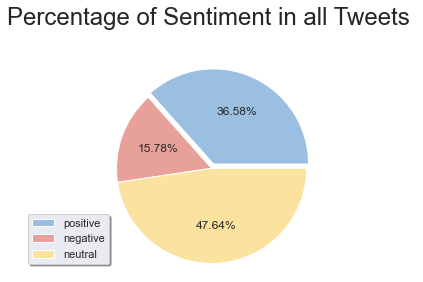

In [15]:
#viewing % posi , neg , neu tweets
explode=(0.05,0,0)
labels = 'positive','negative','neutral'
sizes = [pos,neg,neu]
colours=['#9BBFE0','#E8A09A','#FBE29F']
plt.pie(sizes,explode=explode,colors=colours,autopct='%.2f%%',startangle=0)
plt.title('Percentage of Sentiment in all Tweets \n', fontsize=24)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')

In [16]:
#counting numbers
temp = data.groupby('Score').count()['tweet_lemmatized'].reset_index().sort_values(by='tweet_lemmatized',ascending=False)
temp.columns = ['Sentiment','Tweet Count']
print("Number of Tweets Sentiment wise")
temp.style.background_gradient(cmap='Blues')

Number of Tweets Sentiment wise


In [17]:
data['temp_list'] = data['tweet_lemmatized'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words in all tweets')
fig.show()

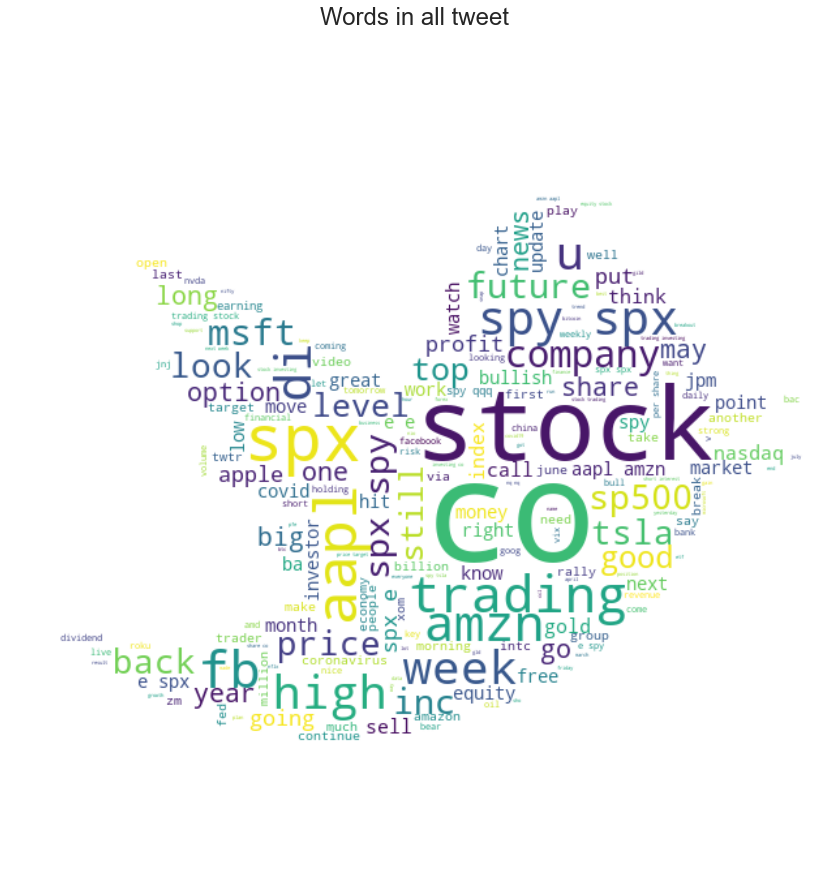

In [19]:
e = "E:/ibm/"
pos_mask = np.array(Image.open(e+'tweet_img.png'))
words = ' '.join([text for text in data['tweet_lemmatized']]) #.join to concat words from text
wordcloud = WordCloud(
    width=800, height=400, background_color='white',mask=pos_mask, max_font_size=110)\
    .generate(words)

plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all tweet\n', fontsize=24)
plt.axis('off')
plt.show()

In [21]:
#according to sentiment
Positive_sent = data[data['Score']=='Positive']
Negative_sent = data[data['Score']=='Negative']
Neutral_sent = data[data['Score']=='Neutral']

In [22]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])   
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
#temp_positive.style.background_gradient(cmap='Greens')
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

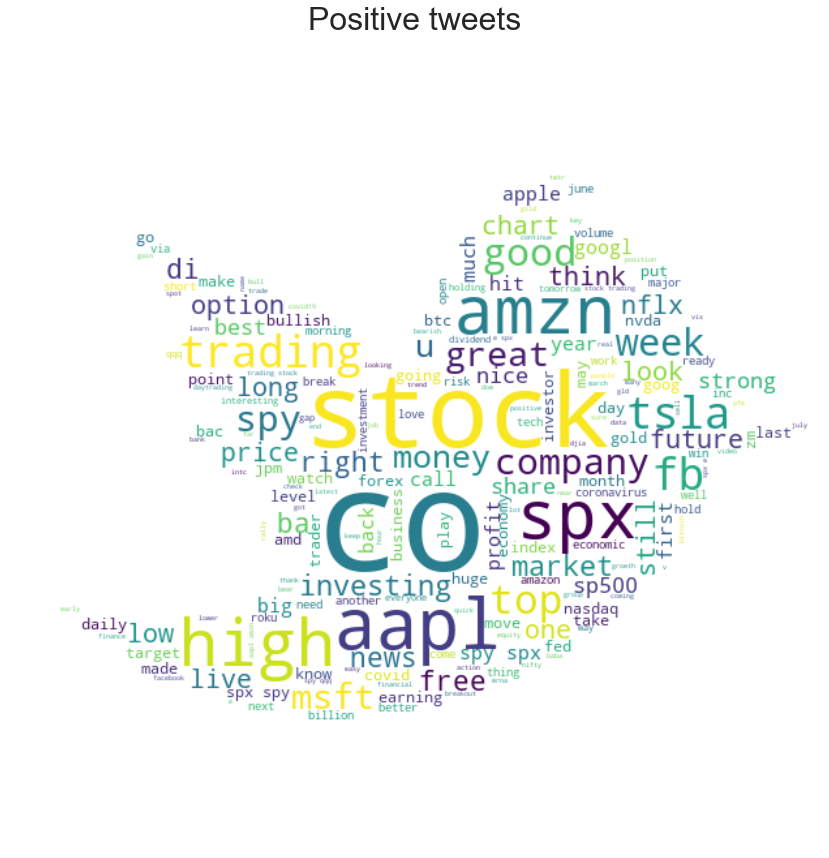

In [23]:
e = "E:/ibm/"
pos_mask = np.array(Image.open(e+'tweet_img.png'))
positive_words =' '.join([text for text in data['tweet_lemmatized'][data['Score'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500,mask=pos_mask,background_color='white', random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Positive tweets",fontsize=32)
plt.show()

In [24]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
#temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
#temp_neutral.style.background_gradient(cmap='Reds')
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

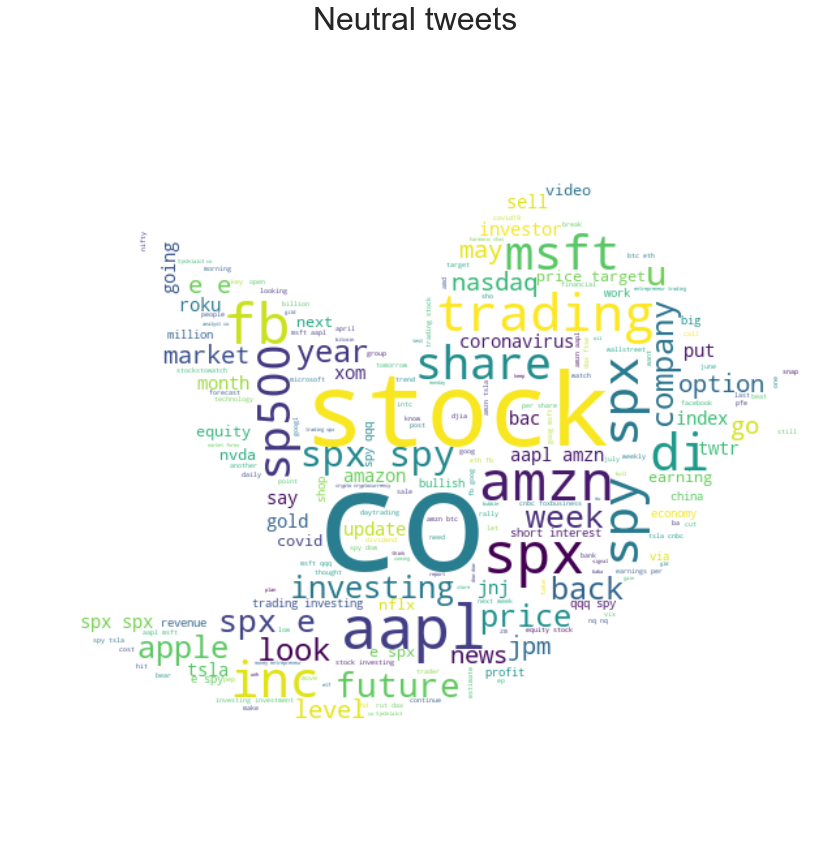

In [27]:
e = "E:/ibm/"
pos_mask = np.array(Image.open(e+'tweet_img.png'))
neutral_words =' '.join([text for text in data['tweet_lemmatized'][data['Score'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500,mask=pos_mask,background_color='white', random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Neutral tweets",fontsize=32)
plt.show()

In [28]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
#temp_negative.style.background_gradient(cmap='Reds')
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

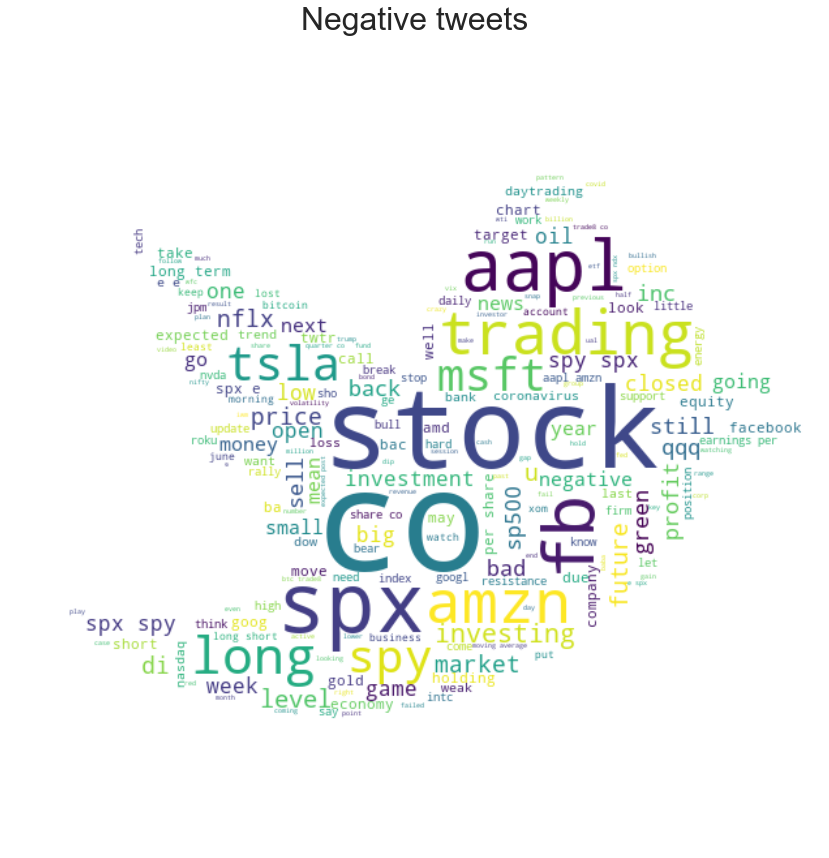

In [29]:
e = "E:/ibm/"
pos_mask = np.array(Image.open(e+'tweet_img.png'))
negative_words =' '.join([text for text in data['tweet_lemmatized'][data['Score'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500,mask=pos_mask,background_color='white', random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Negative tweets",fontsize=32)
plt.show()